In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20940\3797563882.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\archive (2)\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
pd.set_option("display.max.rows", 892)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checked th

In [6]:
100*df.isna().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
survival_count = df["Survived"].value_counts()
survival_rate = 100*survival_count/df.shape[0]
survival_data = pd.concat([survival_count, survival_rate], axis = 1).reset_index()
survival_data.columns = ['Survived', 'count', 'percentage']
survival_rate

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

Text(0.5, 1.0, 'percentage survival of the titanic passanger')

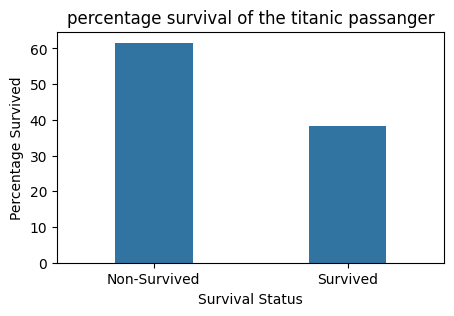

In [8]:
plt.figure(figsize = (5, 3))
sns.barplot(survival_data, x= ['Non-Survived', 'Survived'], y = 'percentage', width = 0.40)
plt.ylabel('Percentage Survived')
plt.xlabel('Survival Status')
plt.title('percentage survival of the titanic passanger')

In [9]:
def survival_acc_to_grp(df, colname):
    plt.figure(figsize = (5, 3))
    survival_by_pclass = df[['Survived', colname]].value_counts().reset_index()
    sns.barplot(survival_by_pclass, x = colname, y = 'count', hue = 'Survived')
    plt.ylabel('Number of Survived')
    plt.title(f'Survival According to {colname}')


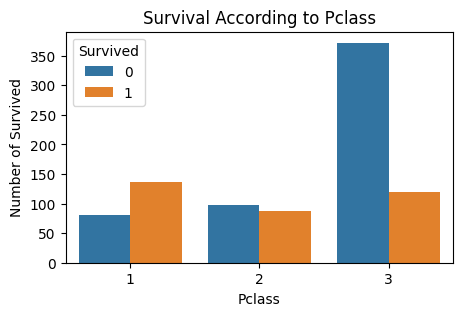

In [10]:
survival_acc_to_grp(df, 'Pclass')

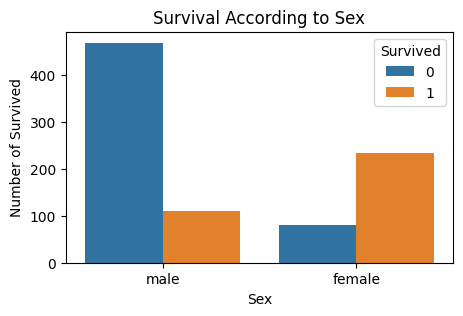

In [11]:
survival_acc_to_grp(df, 'Sex')

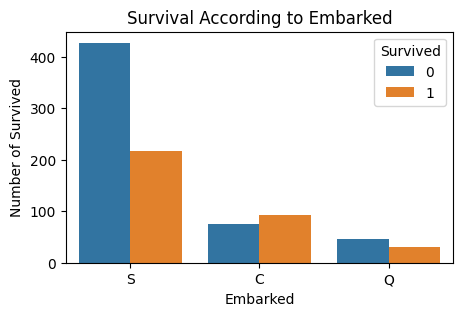

In [12]:
survival_acc_to_grp(df, 'Embarked')

In [13]:
#Function to show dostributive of variables according to survival
def vars_acc_to_surv(df, colname):
    plt.figure(figsize = (6,3))
    sns.kdeplot(df, x=colname, hue = 'Survived')
    plt.title(f'{colname} distribution according to survival')

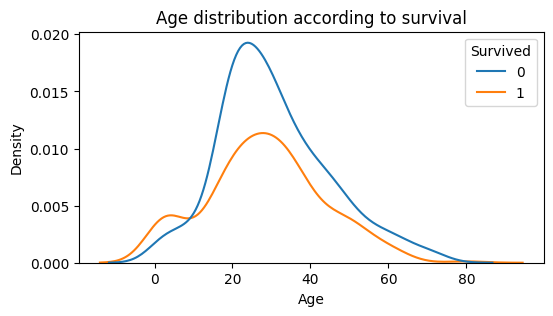

In [14]:
vars_acc_to_surv(df, 'Age')

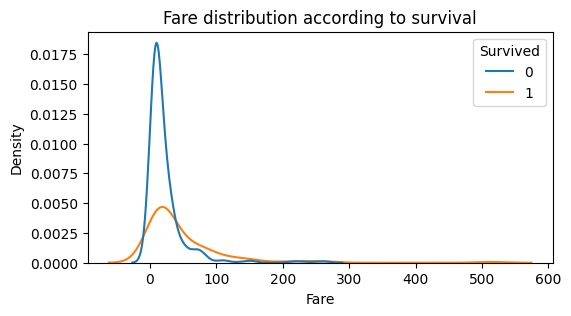

In [15]:
vars_acc_to_surv(df, 'Fare')

In [16]:
# function to visualize count data according to survival
def count_acc_to_surv(df, colname):
    plt.figure(figsize = (6,3))
    df1 = df.groupby(['SibSp', 'Survived']).count()['PassengerId'].reset_index()
    sns.barplot(df1, x='SibSp', y = 'PassengerId', hue = 'Survived')
    plt.title(f'{colname} according to survival')
    plt.xlabel(f'{colname}')
    plt.ylabel('count')
    

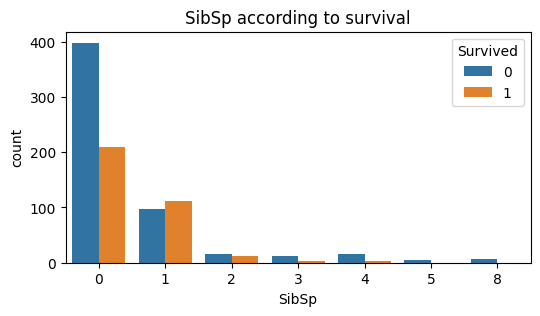

In [17]:
#SibSp distribution according to survival status
count_acc_to_surv(df, 'SibSp')

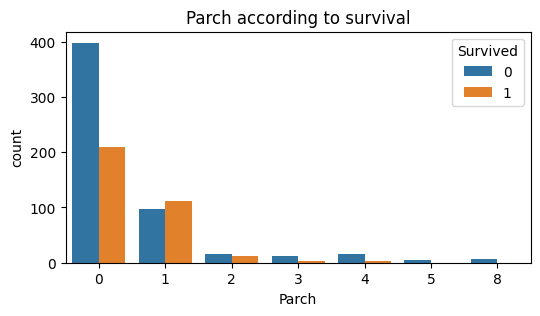

In [18]:
count_acc_to_surv(df, 'Parch')

Text(0.5, 1.0, 'Comparision of the continous variables')

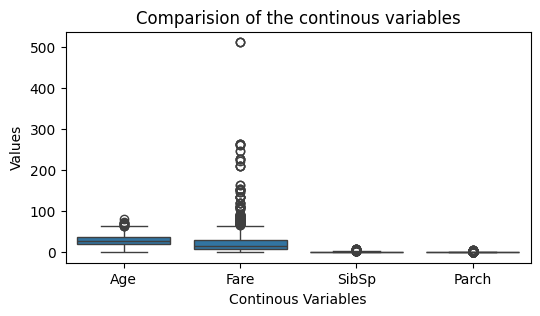

In [19]:
#variablity and the location of the continous variables
cont_vars = pd.melt(df, value_vars = ['Age', 'Fare', 'SibSp', 'Parch'])
plt.figure(figsize = (6,3))
sns.boxplot(cont_vars, x = 'variable', y= 'value')
plt.xlabel('Continous Variables')
plt.ylabel('Values')
plt.title('Comparision of the continous variables')

Data Prepration

In [20]:
#taking out the important features
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
#deleting rows that has null values in  fare column 
df = df.dropna(subset = 'Fare')


In [22]:
#filling up the missing values of the 'age' column by the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

In [23]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [24]:
# handling inbalance
df_survived = df[df['Survived']==1]
df_not_survived = df[df['Survived']==0]
df_survived_resampled = df_survived.sample(n= df_not_survived.shape[0], replace = True, random_state = 101)
df_balanced = pd.concat([df_not_survived, df_survived_resampled]).sample(frac=1, random_state = 26)
df_balanced

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
849,1,1,female,28.0,1,0,89.1042,C
735,0,3,male,28.5,0,0,16.1000,S
857,1,1,male,51.0,0,0,26.5500,S
336,0,1,male,29.0,1,0,66.6000,S
272,1,2,female,41.0,0,1,19.5000,S
...,...,...,...,...,...,...,...,...
354,0,3,male,28.0,0,0,7.2250,C
21,1,2,male,34.0,0,0,13.0000,S
430,1,1,male,28.0,0,0,26.5500,S
244,0,3,male,30.0,0,0,7.2250,C


In [25]:
df_balanced['Survived'].value_counts()

Survived
1    549
0    549
Name: count, dtype: int64

In [26]:
#splitting into x and y
X = df_balanced.drop(['Survived'],axis = 1)
y = df_balanced['Survived']

In [27]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1055)
print(f'''
x_train : {X_train.shape}
x_test : {X_test.shape}
y_train : {y_train.shape}
y_test : {y_test.shape}''')



x_train : (878, 7)
x_test : (220, 7)
y_train : (878,)
y_test : (220,)


In [28]:
#preparing the model pipeline that include

cont_cols = ['Age', 'Fare']
disc_cols = ['SibSp', 'Parch']  # Corrected spelling of 'Parch'
cat_cols = ['Pclass', 'Sex', 'Embarked']

continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

discrete_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])  # Corrected spelling of 'discrete_transformer'

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('cont', continuous_transformer, cont_cols),
        ('disc', discrete_transformer, disc_cols),  # Corrected spelling of 'discrete_transformer'
        ('cat', categorical_transformer, cat_cols)])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('disc',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression())])

In [29]:
# Prediction
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [30]:
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        93
           1       0.87      0.69      0.77       127

    accuracy                           0.76       220
   macro avg       0.77      0.77      0.76       220
weighted avg       0.78      0.76      0.76       220



Text(33.22222222222222, 0.5, 'Predicted Value')

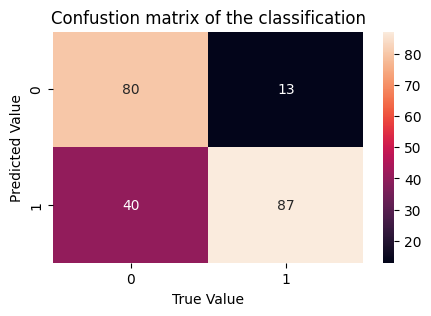

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5, 3))
sns.heatmap(cm, annot = True)
plt.title('Confustion matrix of the classification')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [32]:
# saving the model
with open('./model.pkl', 'wb') as fp:
    pickle.dump(randomForestModel, fp)

NameError: name 'randomForestModel' is not defined